# Import Libraries & Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as st
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv(r'D:\PYTHONCLASSJUPYTER\PrakashSenapati\House_Income.csv')

# Dataset Preview

In [5]:
df.head(5)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [6]:
df.shape

(50, 7)

# Dataset Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [9]:
df.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

# Questions

<font color=red>__1. What is the Mean Expense of a Household?__</font>

In [10]:
df['Mthly_HH_Expense'].mean()

np.float64(18818.0)

<font color=red>__2. What is the Median Household Expense?__</font>

In [11]:
df['Mthly_HH_Expense'].median()

np.float64(15500.0)

<font color=red>__3. What is the Monthly Expense for most of the Households?__</font>

In [12]:
mth_exp_tmp = pd.crosstab(index=df['Mthly_HH_Expense'], columns='count')
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == df.Mthly_HH_Expense.value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


<font color=red>__4. Plot the Histogram to count the Highest qualified member__</font>

<Axes: xlabel='Highest_Qualified_Member'>

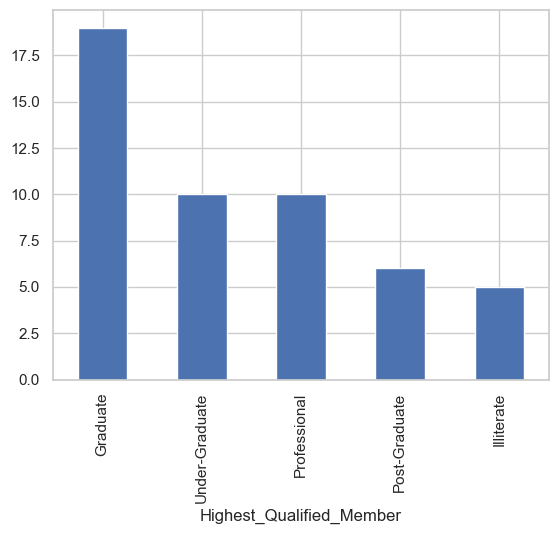

In [13]:
df['Highest_Qualified_Member'].value_counts().plot(kind='bar')

<font color=red>__5. Calculate IQR(difference between 75% and 25% quartile)__</font>

np.float64(15000.0)

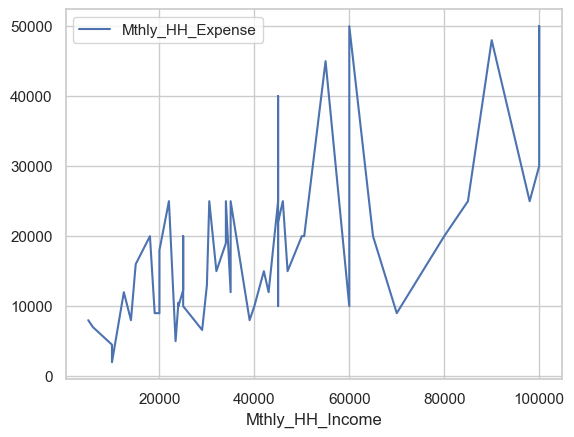

In [15]:
df.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")
IQR = df["Mthly_HH_Expense"].quantile(0.75) - df["Mthly_HH_Expense"].quantile(0.25)
IQR

<font color=red>__6. Calculate Standard Deviation for first 4 columns__</font>

In [16]:
pd.DataFrame(df.iloc[:,0:5].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


<font color=red>__7. Calculate Variance for first 3 columns__</font>

In [17]:
pd.DataFrame(df.iloc[:,0:4].var().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07


<font color=red>__8. Calculate the count of Highest qualified member__</font>

In [18]:
df["Highest_Qualified_Member"].value_counts().to_frame().T

Highest_Qualified_Member,Graduate,Under-Graduate,Professional,Post-Graduate,Illiterate
count,19,10,10,6,5


<font color=red>__9. Plot the Histogram to count the No_of_Earning_Members__</font>

<Axes: xlabel='No_of_Earning_Members'>

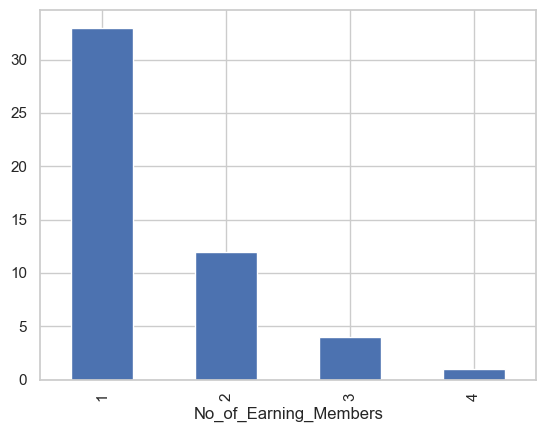

In [19]:
df["No_of_Earning_Members"].value_counts().plot(kind="bar")

<font color=red>__10. Suppose you have option to invest in Stock A or Stock B. The stocks have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation of the returns of these stocks is 10% and 5% respectively. Which is better investment?__</font>

In [20]:
# Here We need to calculate the Coefficient_of_Variation
# Here Coeff_of_var of Stock = Standard Deviation/Return

Coeff_of_var_StockA = 10/15
print(Coeff_of_var_StockA)

Coeff_of_var_StockB = 5/10
print(Coeff_of_var_StockB)

0.6666666666666666
0.5
